In [7]:
import pandas as pd
import numpy as np
import time
import os
import collections
from XFLib import *
import operator

In [62]:
path = 'i2v_sep/'

In [63]:
customer_id_dict = np.load('customer_id_dict.npy').item()

In [64]:
artist_info = list(customer_id_dict.values())

In [65]:
def get_MC(data_dict):
    est = time_est(len(data_dict))
    MC = collections.defaultdict()
    for i in range(len(data_dict)):
        last_item = 0
        for item in data_dict[i]:
            if last_item !=0:
                try:
                    MC[last_item][item] +=1
                except:
                    MC[last_item] = collections.defaultdict(lambda:0)
                    MC[last_item][item] +=1
            last_item = item
        est.check()
    return MC

In [66]:
predict_dict = get_MC(artist_info)

Finished in 00:02:05                                                                                            


In [115]:
recommand_list = []
recommand_dict = dict(sorted(predict_dict["Echosmith"].items(), key=operator.itemgetter(1), reverse=True)[:11])
for i in recommand_dict:
    recommand_list.append([recommand_dict[i],i])

list(reversed(sorted(recommand_list)))
    

[[401085, 'Ed Sheeran'],
 [359459, 'Echosmith'],
 [141087, 'Clean Bandit'],
 [128191, 'David Guetta'],
 [91808, 'Coldplay'],
 [90967, 'Blonde'],
 [85754, 'Nico & Vinz'],
 [80948, 'Vance Joy'],
 [76958, 'LILLYWOOD & Robin Schulz'],
 [59861, 'Oliver Heldens'],
 [29074, 'Clean Bandit & Jess Glynne']]

In [1]:
import gensim

In [2]:
# model = gensim.models.Word2Vec(artist_info, size=100, window=5, min_count=5, workers=4)

In [3]:
# model.save('i2v/i2v')

In [4]:
model = gensim.models.Word2Vec.load('i2v/i2v')

In [5]:
model.most_similar('Echosmith')

[('LILLYWOOD & Robin Schulz', 0.791719377040863),
 ('Nico & Vinz', 0.7900911569595337),
 ('Blonde', 0.7711648941040039),
 ('Clean Bandit', 0.6544537544250488),
 ('Vance Joy', 0.6451825499534607),
 ('Clean Bandit & Jess Glynne', 0.5939112901687622),
 ('Andy C', 0.5340090394020081),
 ('Lights', 0.5002110004425049),
 ('Oliver Heldens', 0.477567583322525),
 ('Rae Morris', 0.4615669548511505)]

In [8]:
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_20newsgroups
import re
import matplotlib.pyplot as plt

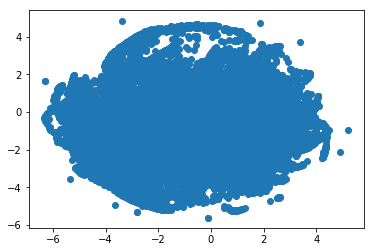

In [105]:
X = model[model.wv.vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)


In [111]:
len(vocab)

19866

In [107]:
np.save('i2v_tsne.npy', X_tsne)

In [11]:
X_tsne = np.load('i2v_tsne.npy')

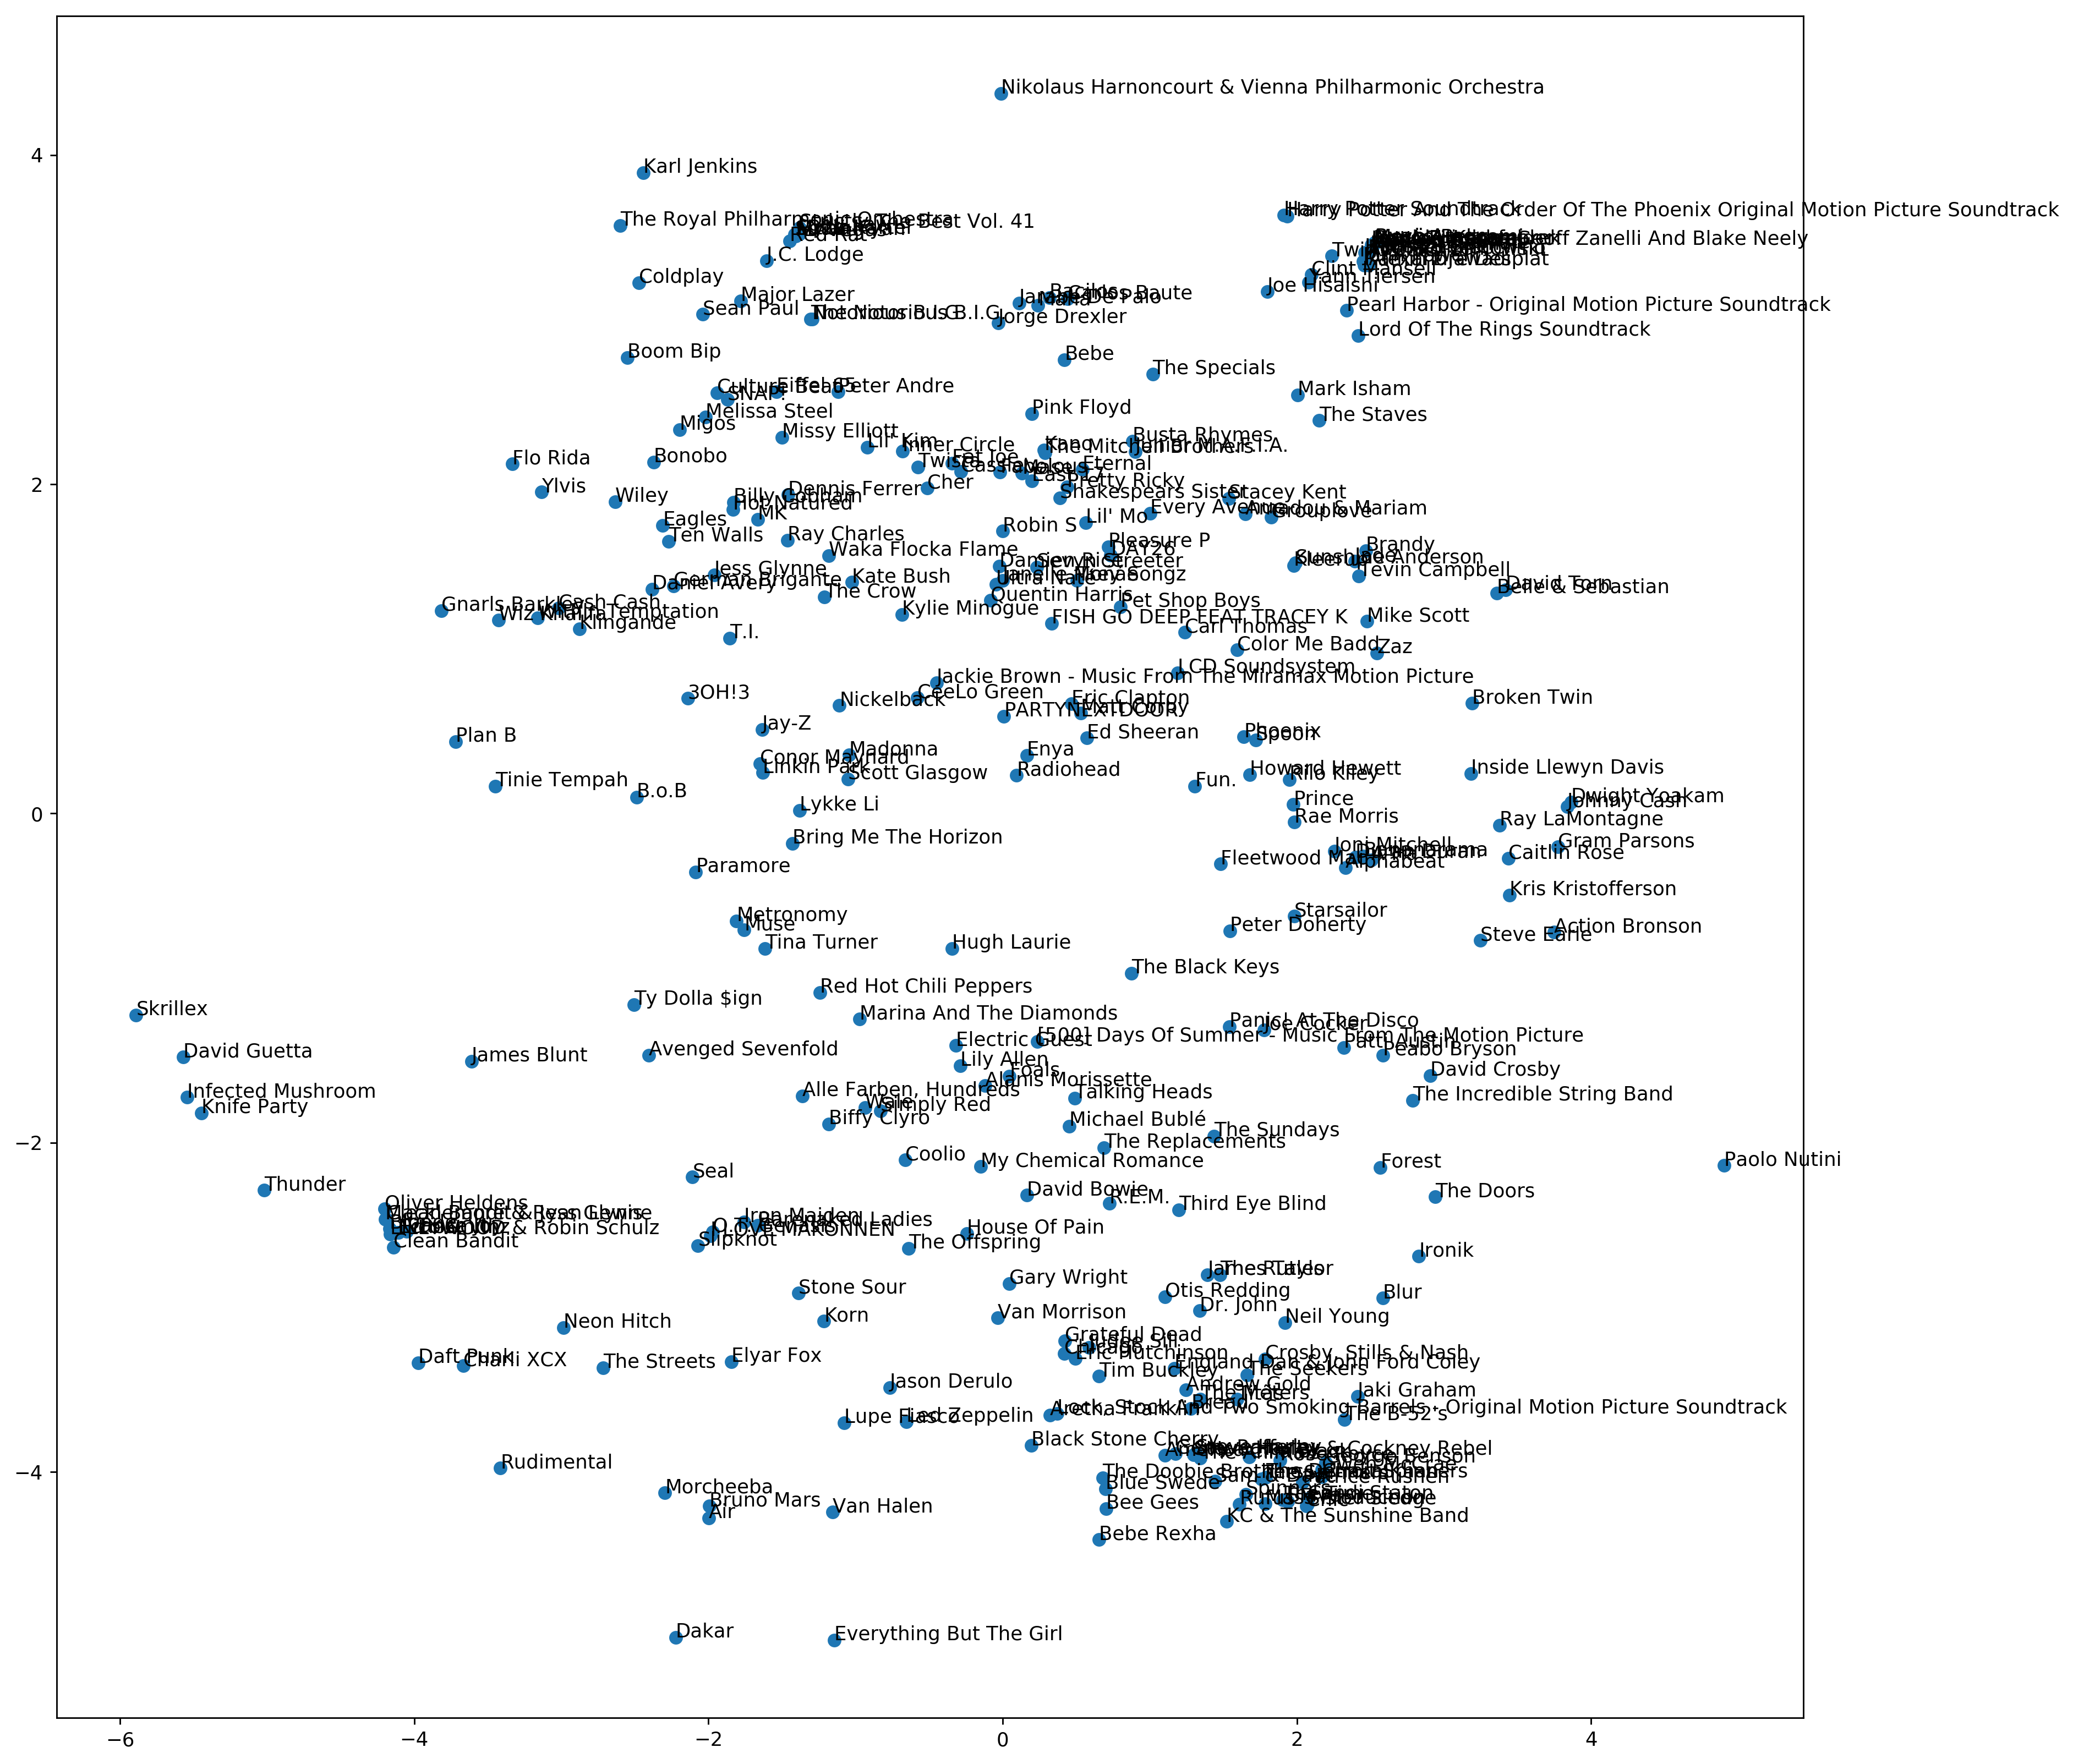

In [14]:
Y = X_tsne[:300]
plt.figure(num=None, figsize=(16, 16), dpi=256, facecolor='w', edgecolor='k')
plt.scatter(Y[:,0],Y[:,1])
vocab = list(model.wv.vocab)
est = time_est(len(vocab))
for label, x,y in zip(vocab[:300], Y[:,0],Y[:,1]):
    plt.annotate(label, xy = (x,y), xytext = (0,0),textcoords = 'offset points')
    est.check()

plt.show()